In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = 20
K = 100             # Carrying capacity?
r = 0.1
N0 = 50             # Starting population
dt = 1/1000         # Time step
tmax = 500          # end time
t_0 = int(5/dt)     # Starting time/padding

# Initialize population history N(t)
N = np.zeros((50, int((5+tmax)/dt+1)))
N[:, 0:t_0+1] = N0
Ndot = np.zeros((50, int(tmax/dt)))

T = np.linspace(0.1, 5, 50)

for i, delay in enumerate(T):
    print(f"{i} of {len(T)}")

    for t in range(int(tmax/dt)):
        Ndot[i, t] = r*N[i, t+t_0] * (1 - N[i, t+t_0-int(delay/dt)]/K) * (N[i, t+t_0]/A - 1)
        N[i, t+t_0+1] = N[i, t+t_0] + Ndot[i, t]*dt

0 of 50
1 of 50
2 of 50
3 of 50
4 of 50
5 of 50
6 of 50
7 of 50
8 of 50
9 of 50
10 of 50
11 of 50
12 of 50
13 of 50
14 of 50
15 of 50
16 of 50
17 of 50
18 of 50
19 of 50
20 of 50
21 of 50
22 of 50
23 of 50
24 of 50
25 of 50
26 of 50
27 of 50
28 of 50
29 of 50
30 of 50
31 of 50
32 of 50
33 of 50
34 of 50
35 of 50
36 of 50
37 of 50
38 of 50
39 of 50
40 of 50
41 of 50
42 of 50
43 of 50
44 of 50
45 of 50
46 of 50
47 of 50
48 of 50
49 of 50


Dynamics for all T:

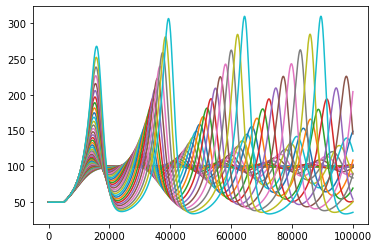

In [3]:
for row in N:
    plt.plot(row[0:100000])
plt.show()

a) Show examples of the different dynamics obtained in this model: no oscillations, damped oscillations, and stable oscillations (limit cycle).

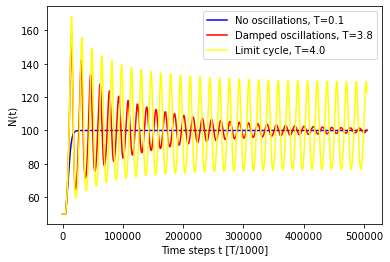

In [35]:
a_lines = [0, 30, 40]

plt.plot(N[0,:], label=f'No oscillations, T={T[0]}', color='blue')
plt.plot(N[37,:], label=f'Damped oscillations, T={3.8}', color='red')
plt.plot(N[39,:], label=f'Limit cycle, T={T[39]}', color='yellow')
#plt.plot(N[49,:], color='green')

plt.xlabel('Time steps t [T/1000]')
plt.ylabel('N(t)')
plt.legend(loc='upper right')
plt.show()


b) Estimate numerically the value of T at which the dynamics starts exhibiting damped oscillations.

In [5]:
for i, row in enumerate(N):
    if max(row) > 100:
        print(f'Damped oscillations have started showing at delays of T = {T[i]} seconds.\nThe highest N reached {max(row)-100} over the steady state.')
        break

Damped oscillations have started showing at delays of T = 1.0 seconds.
The highest N reached 0.0027527758706611394 over the steady state.


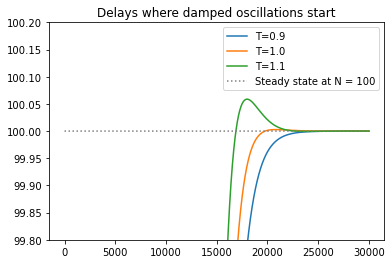

In [25]:
plt.plot(N[8, 0:30000], label=f'T={T[8]}')
plt.plot(N[9, 0:30000], label=f'T={T[9]}')
plt.plot(N[10, 0:30000], label=f'T={T[10]}')
plt.plot(np.ones(30000)*100, color='gray', linestyle='dotted', label=f'Steady state at N = {K}')
ax = plt.gca()
ax.set_ylim([99.8, 100.2])
plt.legend()
plt.title('Delays where damped oscillations start')

plt.show()

c) Estimate numerically the value of T (denoted by TH) at which a bifurcation
(Hopf bifurcation) occurs.

Up until T = 3.8 it is quite obvious that oscillations are damped, so we look at delays larger than that to find where peaks of oscillations are approximately equal. 

In [40]:
for i, row in enumerate(N):
    if i > 36:
        print(f'For T = {T[i]}:')
        prev = np.inf
        peaks = []
        ids = []
        for j, val in enumerate(row):
            if j >= 300000:
                if row[j]<row[j-1]>row[j-2]:

                    peaks.append(row[j-1])
                    ids.append(j-1)
            prev = np.copy(row[j])
        print(f'Var: {np.var(peaks)}')
        if np.var(peaks) < 0.2:
            print(f'Limit cycle reached at T = {T[i]}')
            break


For T = 3.8000000000000003:
Var: 0.9038594184141863
For T = 3.9000000000000004:
Var: 2.2611297117181857
For T = 4.0:
Var: 0.16161042658702823
Limit cycle reached at T = 4.0
